### Conditional Edges

The dashed lines represents conditional edges and solid line represents static edges.

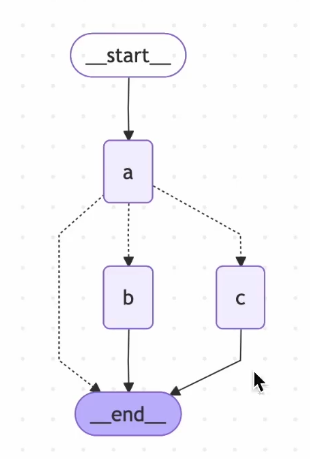

In [1]:
from IPython.display import Image, display
import operator
from typing import Annotated, List, Literal, TypedDict
from langgraph.graph import START, END, StateGraph
from langgraph.types import Command, Interrupt

In [2]:
class State(TypedDict):
    nlist: Annotated[list[str], operator.add]

In [15]:
# Here let the graph decide dynamically which edges to take.

def node_a(state: State)-> Command[Literal["b", "c", END]]:
    select = state["nlist"][-1]
    if select == "b":
        next_node = "b"
    elif select == "c":
        next_node = "c"
    elif select == "q":
        next_node = END
    else:
        next_node = END

    return Command(
        update = State(nlist = [select]),
        goto = [next_node]
    )

def node_b(state: State) -> State:
    return(State(nlist = ["B"]))

def node_c(state: State) -> State:
    return(State(nlist = ["C"]))

In [16]:
# # Let's build the Conditonal Edge

# def conditional_edge(state: State) -> Literal["b", "c", END]:
#     select = state["nlist"][-1]
#     if select == "b":
#         return "b"
#     elif select == "c":
#         return "c"
#     elif select == "q":
#         return END
#     else:
#         return END

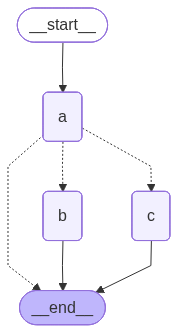

In [17]:
# Build the graoh -

builder = StateGraph(State)

# Add nodes 
builder.add_node("a", node_a)
builder.add_node("b", node_b)
builder.add_node("c", node_c)

# Add edges 
builder.add_edge(START, "a")
builder.add_edge("b", END)
builder.add_edge("c", END)
#builder.add_conditional_edges("a", conditional_edge)

# Compile & Display
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [19]:
user = input('b, c, or q to quit: ')

input_state = State(
    nlist = [user]
)

graph.invoke(input_state)

b, c, or q to quit:  q


{'nlist': ['q', 'q']}

In [20]:
while True:
    user = input('b, c, or q to quit: ')
    print(user)
    input_state = State(nlist = [user])
    result = graph.invoke(input_state)
    print(result)
    if result['nlist'][-1] == 'q':
        print("quit")
        break

b, c, or q to quit:  b


b
{'nlist': ['b', 'b', 'B']}


b, c, or q to quit:  c


c
{'nlist': ['c', 'c', 'C']}


b, c, or q to quit:  q


q
{'nlist': ['q', 'q']}
quit


### Memory

* Checkpoint (memory) - State is stored to a checkpoint at the end of a step.
* Thread - A thread identifies a collection of checkpoints.

In [21]:
from langgraph.checkpoint.memory import InMemorySaver

In [22]:
memory = InMemorySaver()
config = {"configurable": {"thread_id": "1"}}

In [23]:
graph = builder.compile(checkpointer = memory)

In [24]:
while True:
    user = input('b, c, or q to quit: ')
    input_state = State(nlist = [user])
    result = graph.invoke(input_state, config)
    print(result)

    if result['nlist'][-1] == "q":
        print("quit")
        break

b, c, or q to quit:  b


{'nlist': ['b', 'b', 'B']}


b, c, or q to quit:  b


{'nlist': ['b', 'b', 'B', 'b', 'b', 'B']}


b, c, or q to quit:  c


{'nlist': ['b', 'b', 'B', 'b', 'b', 'B', 'c', 'c', 'C']}


b, c, or q to quit:  q


{'nlist': ['b', 'b', 'B', 'b', 'b', 'B', 'c', 'c', 'C', 'q', 'q']}
quit
